In [569]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [570]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [571]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [73]:
def reDefineDVCS(df_epg):

    df_epg.loc[:, 'newPe'] = df_epg.t2/2/M + M
    df_epg.loc[:, 'newPp'] = np.sqrt(df_epg.newPe**2 - M**2)
    df_epg.loc[:, 'newGp'] = df_epg.nu - df_epg.t2/M/2
    
    df_epg.loc[:, 'dPp'] = df_epg.loc[:, 'newPp'] -  df_epg.loc[:, 'Pp']
    df_epg.loc[:, 'dGp'] = df_epg.loc[:, 'newGp'] -  df_epg.loc[:, 'Gp']

    return df_epg

In [572]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl/exp/"

# df_3063_corr = pd.read_pickle(parent_MC + "3063.pkl")
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
# df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
# df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [573]:
dvcsSimInb = df_3987_corr
bkgSimInb = df_4076_1g_corr
pi0SimInb = df_4076_2g_corr
# dvcsSimInb = df_3063_corr
# bkgSimInb = df_3284_1g_corr
# pi0SimInb = df_3284_2g_corr

In [76]:
exp_1g_corr = reDefineDVCS(exp_1g_corr)
bkgSimInb = reDefineDVCS(bkgSimInb)
dvcsSimInb = reDefineDVCS(dvcsSimInb)

In [551]:
exp_1g_corr = correctDVCS(exp_1g_corr)
exp_2g_corr = correctDVCS(exp_2g_corr)

In [552]:
dvcsSimInb = smearingDVCS(dvcsSimInb, 0.014)
bkgSimInb = smearingDVCS(bkgSimInb, 0.014)
pi0SimInb = smearingDVCS(pi0SimInb, 0.014)

In [545]:
exp_1g_corr = correctDVCS2(exp_1g_corr)
exp_2g_corr = correctDVCS2(exp_2g_corr)

In [64]:
exp_1g_corr.Pp

3          1.046228
7          0.380603
10         0.537860
11         0.463402
12         0.779595
             ...   
3663183    0.698040
3663184    0.976532
3663186    0.563861
3663187    0.388254
3663204    0.420952
Name: Pp, Length: 1051653, dtype: float64

In [563]:
dvcsSimInb = smearingDVCS2(dvcsSimInb, 0.1)
bkgSimInb = smearingDVCS2(bkgSimInb, 0.1)
pi0SimInb = smearingDVCS2(pi0SimInb, 0.1)

In [562]:
exp_1g_corr = correctDVCS3(exp_1g_corr, 0.025)
exp_2g_corr = correctDVCS3(exp_2g_corr, 0.025)

In [127]:
dvcsSimInb = smearingDVCS3(dvcsSimInb, 0.035)
bkgSimInb = smearingDVCS3(bkgSimInb, 0.035)
pi0SimInb = smearingDVCS3(pi0SimInb, 0.035)

NameError: name 'pi0ExpInb' is not defined

In [564]:
epgExpInbFD = copy(exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&((exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<32))& (exp_1g_corr.Gsector<7)])
pi0ExpInbFD = copy(exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&((exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<32))& (exp_2g_corr.Gsector<7)])
dvcsSimInbFD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&((dvcsSimInb.Psector<7)&(dvcsSimInb.Ptheta<32))& (dvcsSimInb.Gsector<7)])
bkgSimInbFD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&((bkgSimInb.Psector<7)&(bkgSimInb.Ptheta<32))& (bkgSimInb.Gsector<7)])
pi0SimInbFD = copy(pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&((pi0SimInb.Psector<7)&(pi0SimInb.Ptheta<32))& (pi0SimInb.Gsector<7)& (pi0SimInb.Gsector2<7)])

epgExpInbCD = copy(exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.4)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector<7)])
pi0ExpInbCD = copy(exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.4)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector<7)& (exp_2g_corr.Gsector2<7)])
dvcsSimInbCD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.4)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector<7)])
bkgSimInbCD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.4)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector<7)])
pi0SimInbCD = copy(pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.4)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector<7)])

epgExpInbCDFT = exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.25)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]
pi0ExpInbCDFT = exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.25)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]
dvcsSimInbCDFT = dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
bkgSimInbCDFT = bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.25)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]

# epgExpInbCDFT = exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]
# pi0ExpInbCDFT = exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]
# dvcsSimInbCDFT = dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
# bkgSimInbCDFT = bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]
# pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]


# epgExpInbFD = copy(exp_1g_corr.loc[((exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<32))& (exp_1g_corr.Gsector<7)])
# pi0ExpInbFD = copy(exp_2g_corr.loc[((exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<32))& (exp_2g_corr.Gsector<7)])
# dvcsSimInbFD = copy(dvcsSimInb.loc[((dvcsSimInb.Psector<7)&(dvcsSimInb.Ptheta<32))& (dvcsSimInb.Gsector<7)])
# bkgSimInbFD = copy(bkgSimInb.loc[((bkgSimInb.Psector<7)&(bkgSimInb.Ptheta<32))& (bkgSimInb.Gsector<7)])
# pi0SimInbFD = copy(pi0SimInb.loc[((pi0SimInb.Psector<7)&(pi0SimInb.Ptheta<32))& (pi0SimInb.Gsector<7)& (pi0SimInb.Gsector2<7)])

# epgExpInbCD = copy(exp_1g_corr.loc[((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector<7)])
# pi0ExpInbCD = copy(exp_2g_corr.loc[((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector<7)& (exp_2g_corr.Gsector2<7)])
# dvcsSimInbCD = copy(dvcsSimInb.loc[((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector<7)])
# bkgSimInbCD = copy(bkgSimInb.loc[((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector<7)])
# pi0SimInbCD = copy(pi0SimInb.loc[((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector<7)])

# epgExpInbCDFT = exp_1g_corr.loc[((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]
# pi0ExpInbCDFT = exp_2g_corr.loc[((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]
# dvcsSimInbCDFT = dvcsSimInb.loc[((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
# bkgSimInbCDFT = bkgSimInb.loc[((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]
# pi0SimInbCDFT = pi0SimInb.loc[((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]

In [103]:
print(len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT))

63869 135260 108443


In [15]:
# contCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
# contFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
# print(contFD, contCD, contCDFT)
# contFD=0.45

In [47]:
print(contFD, contCD, contCDFT)

0.41825082433291544 0.17519744949777136 0.028418498125438417


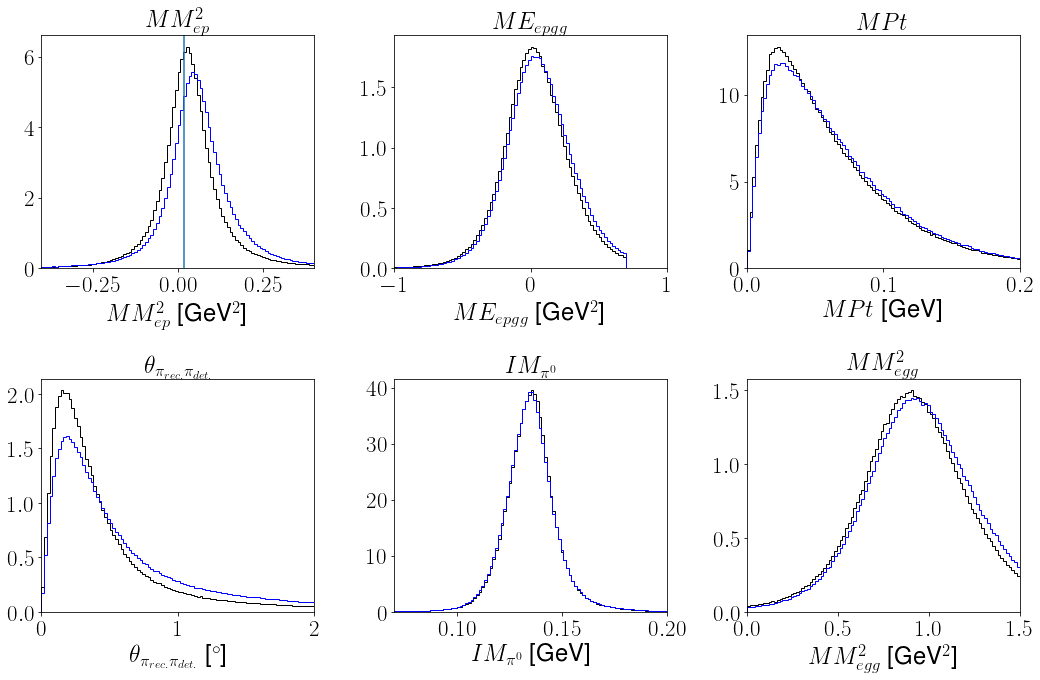

In [24]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [-0.4, -1, 0, 0, 0.07, 0]
binends = [0.4, 1, 0.2, 2, 0.2, 1.5]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(df_3284_2g_corr.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(df_4013_2g_corr.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
axs[0, 0].axvline(0.135**2)
plt.show()

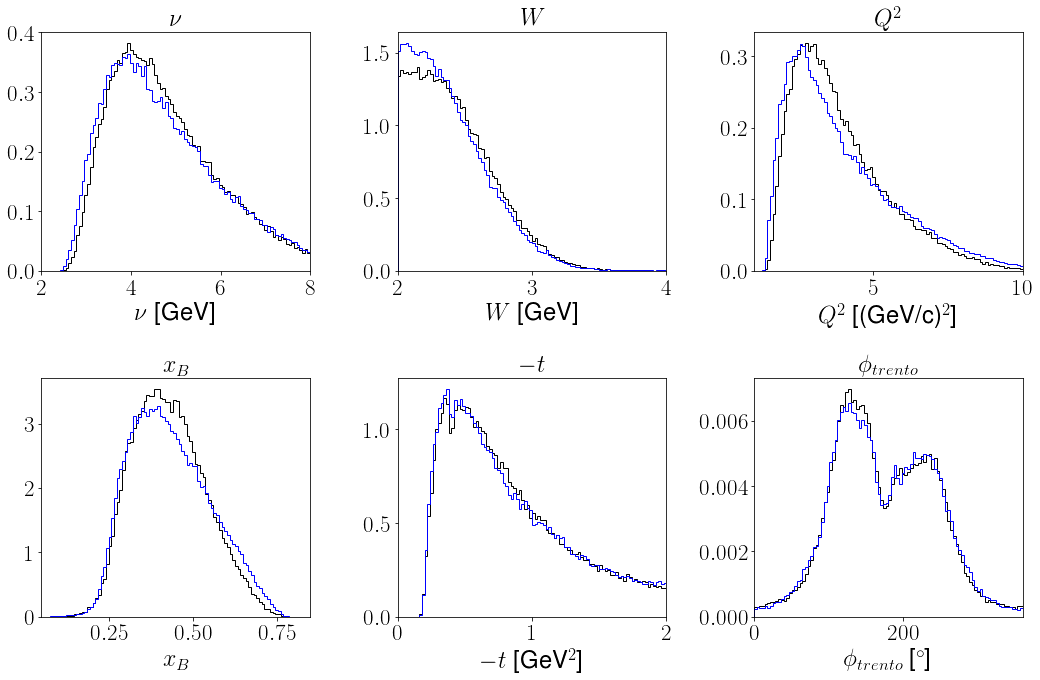

In [318]:
varstoplot = ["nu", "W", "Q2", "xB", "t1", "phi1"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [2, 2, 1, 0.05, 0, 0]
binends = [8, 4, 10, 0.85, 2, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

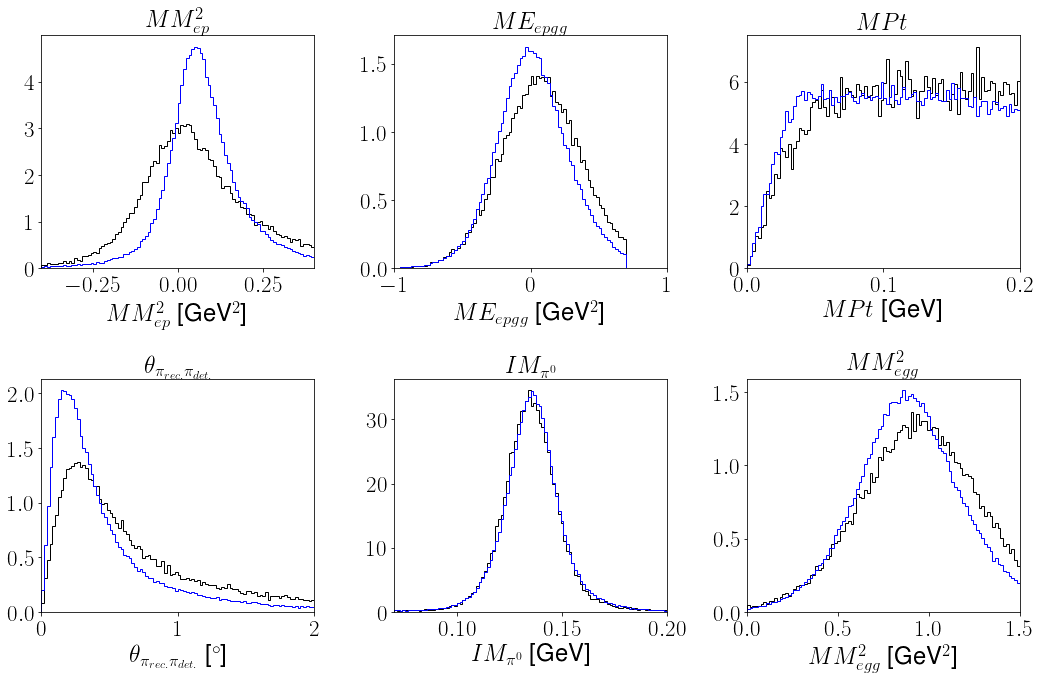

In [574]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [-0.4, -1, 0, 0, 0.07, 0]
binends = [0.4, 1, 0.2, 2, 0.2, 1.5]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

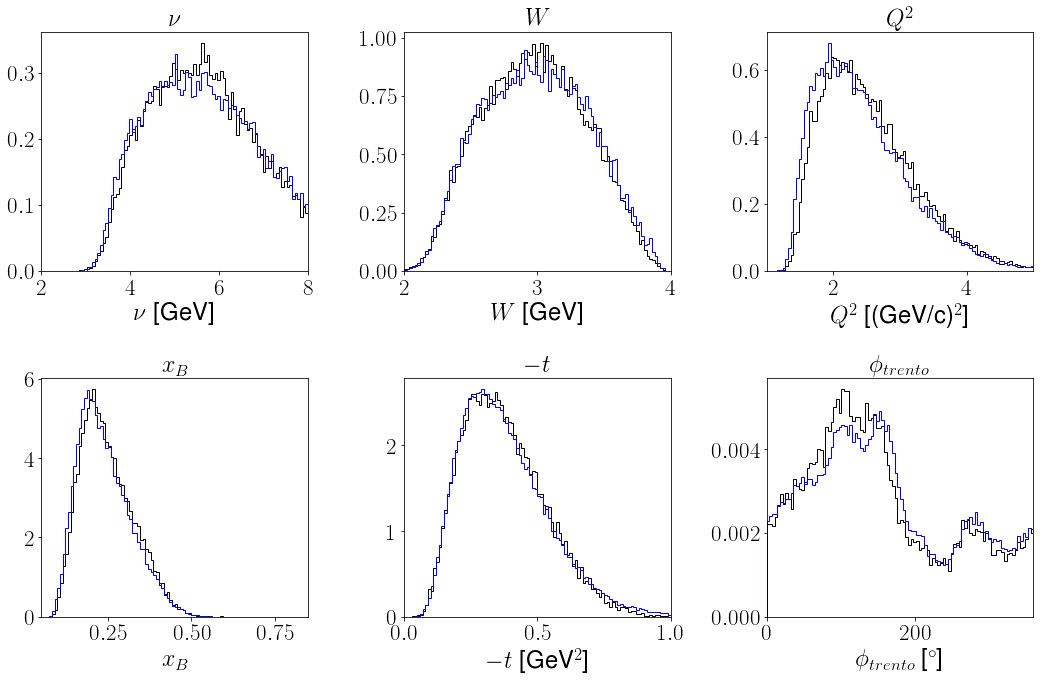

In [575]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [2, 2, 1, 0.05, 0, 0]
binends = [8, 4, 5, 0.85, 1, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

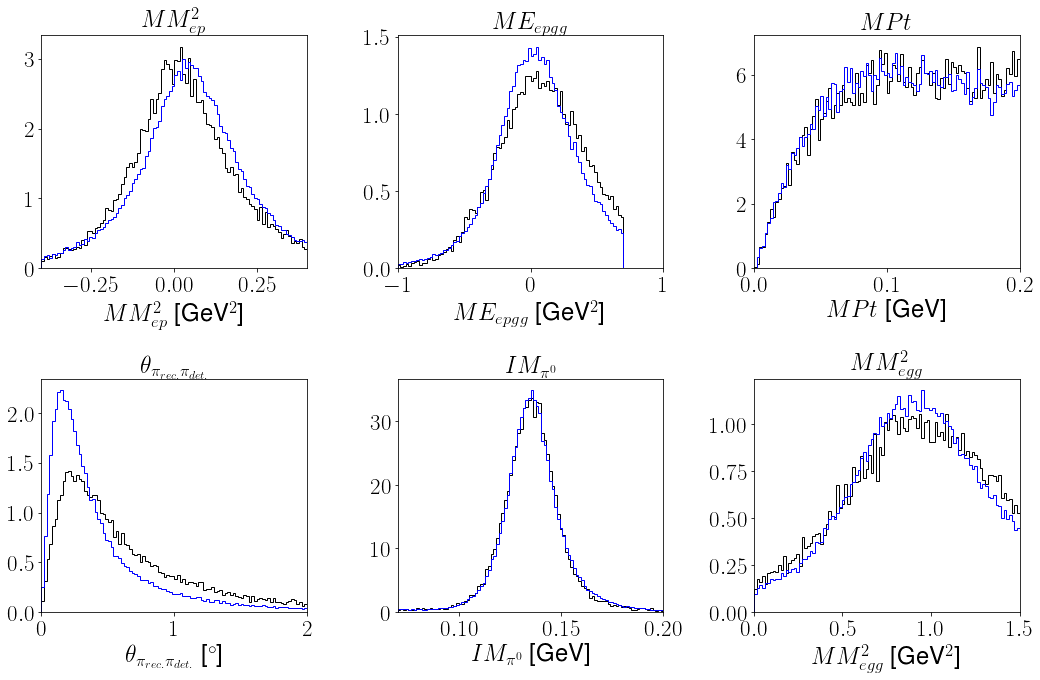

In [576]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [-0.4, -1, 0, 0, 0.07, 0]
binends = [0.4, 1, 0.2, 2, 0.2, 1.5]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [549]:
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
print(contFD, contCD, contCDFT)
# contFD=0.45

0.4278537326933649 0.16794446510520047 0.029070603547755074


nu 5.255476714648377
xB 0.41922507921713087
W 2.572121309603827
t2 0.6561489569243085
Q2 4.272497822700942
phi2 173.70938735523572


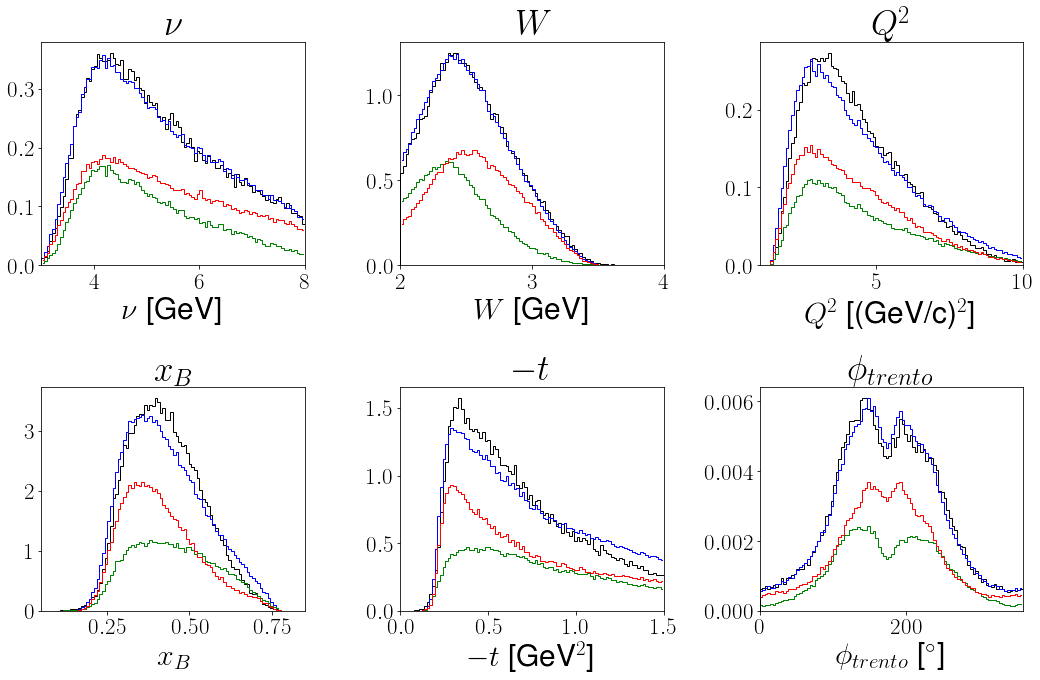

<Figure size 864x648 with 0 Axes>

In [132]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.05, 0, 0]
binends = [8, 4, 10, 0.85, 1.5, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, contFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, (1-contFD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 35.04782890256449 0.025
reconGam 0.7165723498102103 0.5
coplanarity 3.3208252399736202 0.09999999999999998
ME_epg 0.1700328993531425 0.5882352941176471
MM2_epg -0.0007895112978348702 49.99999999999999
MM2_eg 1.0083901918531757 0.6249999999999999
MM2_ep 0.04993698054124169 1.2499999999999998
MPt 0.06001131220560268 8.333333333333332


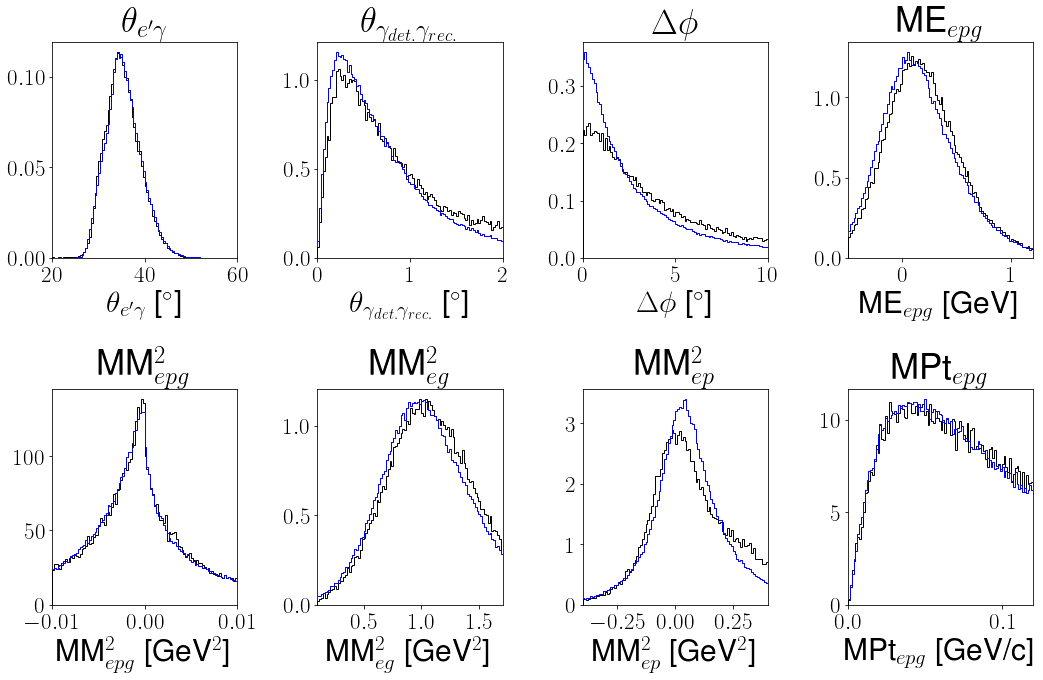

<Figure size 864x648 with 0 Axes>

In [140]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [60, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(smearingDVCS4(bkgSimInbFD, 0.06)[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(smearingDVCS4(dvcsSimInbFD, 0.06)[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins), simDist.mean())
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

nu 6.062352060850538
xB 0.2334013334931135
W 3.1592311252637697
t2 0.3099030428634444
Q2 2.67874672090317
phi2 155.2130981744801


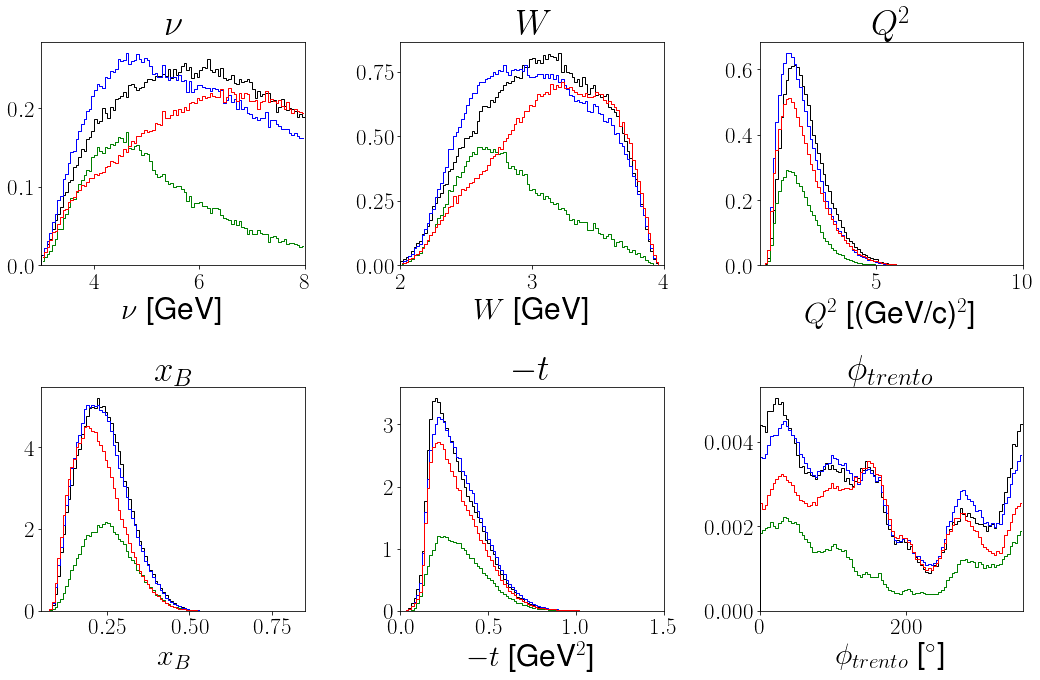

<Figure size 864x648 with 0 Axes>

In [134]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.05, 0, 0]
binends = [8, 4, 10, 0.85, 1.5, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, contFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_FD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, (1-contCD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 24.169142338619398
reconGam 0.4963297298995011
coplanarity 2.6156798779045043
ME_epg 0.12252713883290636
MM2_epg -0.0011876087140827657
MM2_eg 0.8886989690119773
MM2_ep 0.017126935460709692
MPt 0.05080428029624647


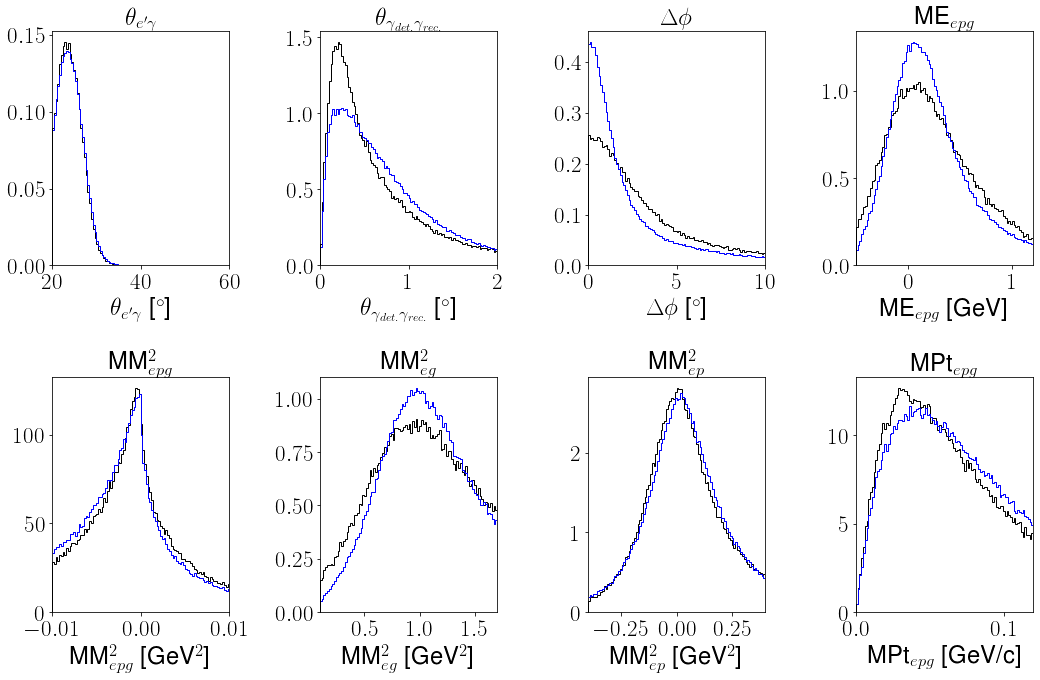

<Figure size 432x288 with 0 Axes>

In [567]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [60, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

nu 8.437919090707956
xB 0.19309112696458958
W 3.698521706384072
t2 0.18418725829934893
Q2 3.058975384872053
phi2 162.84350557595138


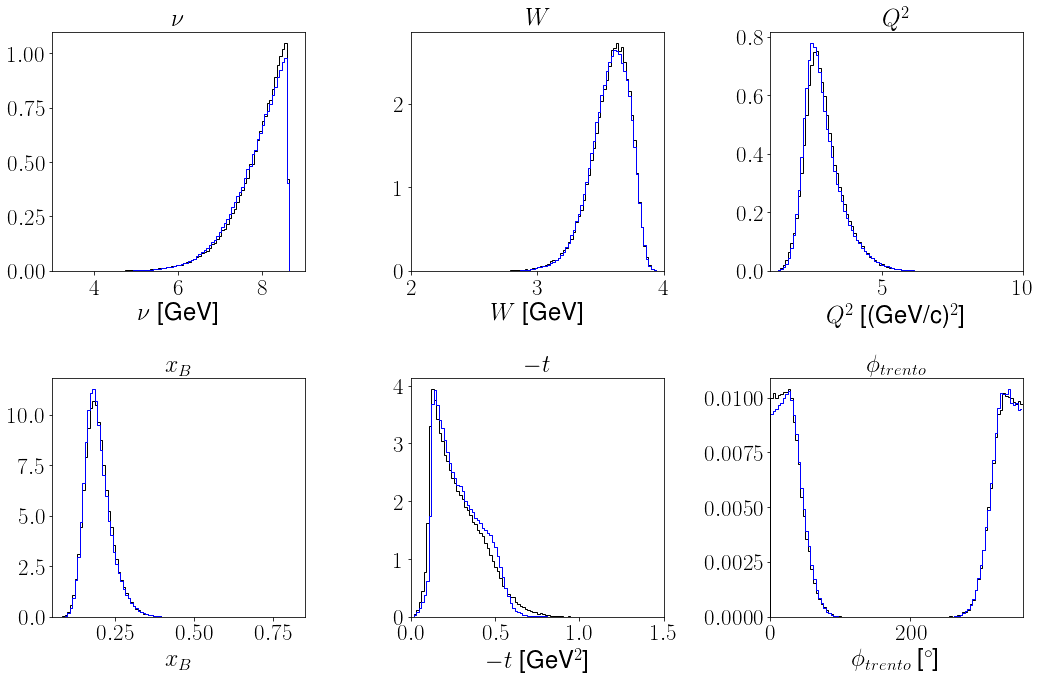

<Figure size 432x288 with 0 Axes>

In [217]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 1, 0.05, 0, 0]
binends = [9, 4, 10, 0.85, 1.5, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_smearingDVCS(dvcsSimInbCDFT, 0.014)-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_smearingDVCS(dvcsSimInbCDFT, 0.014))*simDist_dvcs
        simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
#         expDist, bins = np.histogram(correctDVCS(epgExpInbCDFT)[varstoplot[ind]], bins, density=True)
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, contCDFT*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_smearingDVCS(dvcsSimInbCDFT, 0.014)-cont_inb_CDFT/len_smearingDVCS(dvcsSimInbCDFT, 0.014))*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-contCDFT)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 22.866351969541324
reconGam 0.0457234874924314
coplanarity 1.6514007224812806
ME_epg -0.6146867149258045
MM2_epg -0.003291400926844262
MM2_eg 0.5615095565509506
MM2_ep -0.015256378991710597
MPt 0.008336610718524063


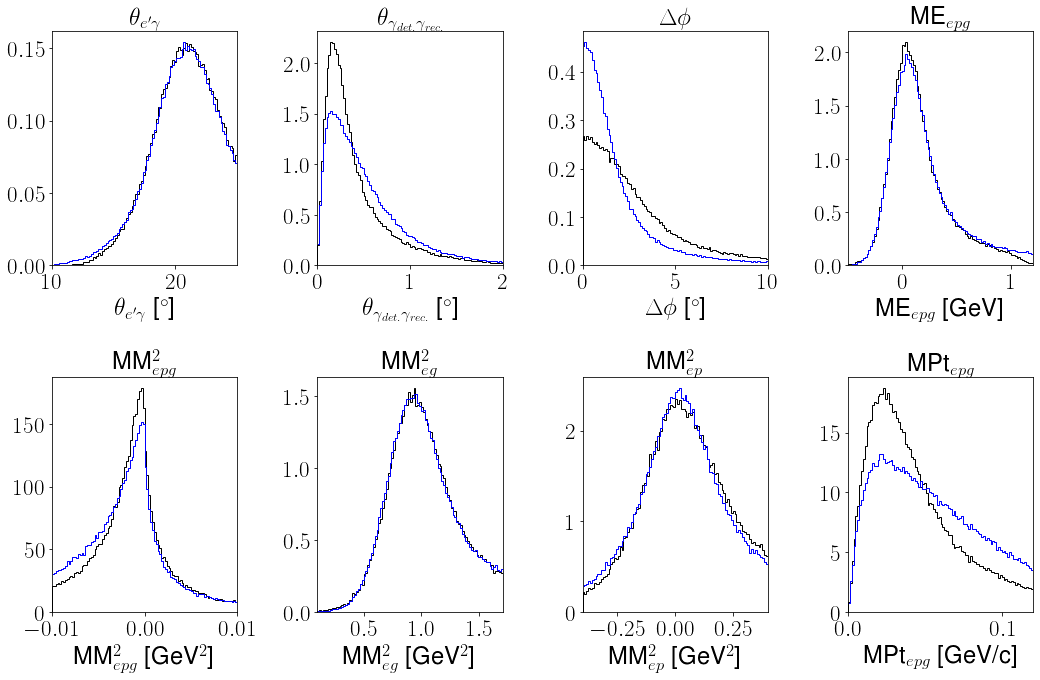

<Figure size 432x288 with 0 Axes>

In [568]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [25, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_smearingDVCS(dvcsSimInbCDFT, 0.014)-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_smearingDVCS(dvcsSimInbCDFT, 0.014))*simDist_dvcs
        simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_smearingDVCS(dvcsSimInbCDFT, 0.014)-cont_inb_CDFT/len_smearingDVCS(dvcsSimInbCDFT, 0.014))*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

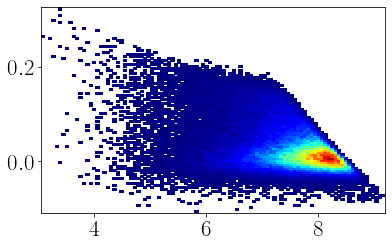

In [34]:
plt.hist2d(epgExpInbCDFT.Gp, (epgExpInbCDFT.newGp - epgExpInbCDFT.Gp)/epgExpInbCDFT.Gp, bins = 101, cmin = 1, cmap= cmap)
plt.show()

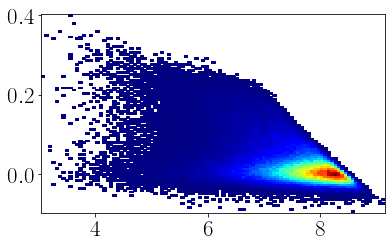

In [35]:
plt.hist2d(dvcsSimInbCDFT.Gp, (dvcsSimInbCDFT.newGp - dvcsSimInbCDFT.Gp)/dvcsSimInbCDFT.Gp, bins = 101, cmin = 1, cmap= cmap)
plt.show()

<AxesSubplot:>

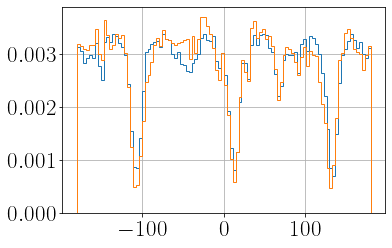

In [31]:
dvcsSimInbCDFT.Pphi.hist(bins = np.linspace(-180, 180, 101), density=True, histtype = 'step')
(epgExpInbCDFT.Pphi).hist(bins = np.linspace(-180, 180, 101), density=True, histtype = 'step')

In [10]:
def correctDVCS(df_epg, correction=None):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
#     df_epg.loc[:, 'Pp'] = mag(pro)
#     df_epg.loc[:, 'Pe'] = getEnergy(pro, 0)
#     df_epg.loc[:, 'Ptheta'] = getTheta(pro)
#     df_epg.loc[:, 'Pphi'] = getPhi(pro)

    df_epg.loc[df_epg.Gsector>7, 'Gp'] = df_epg.loc[df_epg.Gsector>7, 'Gp'] + 0.25
    df_epg.loc[df_epg.Gsector>7, 'Ge'] = df_epg.loc[df_epg.Gsector>7, 'Ge'] + 0.25
#     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
#     df_epg.loc[:, 'Gphi'] = getPhi(gam)
    df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


In [11]:
def smearingDVCS(df_epg, sigma = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
#     df_epg.loc[:, 'Pp'] = mag(pro)
#     df_epg.loc[:, 'Pe'] = getEnergy(pro, 0)
#     df_epg.loc[:, 'Ptheta'] = getTheta(pro)
#     df_epg.loc[:, 'Pphi'] = getPhi(pro)

    df_epg.loc[df_epg.Gsector>7, 'Gp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Gsector>7]))*df_epg.loc[df_epg.Gsector>7, 'Gp']
    df_epg.loc[df_epg.Gsector>7, 'Ge'] = df_epg.loc[df_epg.Gsector>7, 'Gp']
#     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
#     df_epg.loc[:, 'Gphi'] = getPhi(gam)
    df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


In [222]:
def correctDVCS2(df_epg, correction=0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector>7, 'Pp'] = df_epg.loc[df_epg.Psector>7, 'Pp'] + 0.01
    df_epg.loc[df_epg.Psector>7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector>7, 'Pp']**2+M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
    
#     df_epg.loc[df_epg.Gsector>7, 'Gp'] = df_epg.loc[df_epg.Gsector>7, 'Gp'] + 0.25
#     df_epg.loc[df_epg.Gsector>7, 'Ge'] = df_epg.loc[df_epg.Gsector>7, 'Ge'] + 0.25
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


In [21]:
def smearingDVCS2(df_epg, sigma = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector>7, 'Pp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Psector>7]))*df_epg.loc[df_epg.Psector>7, 'Pp']
    df_epg.loc[df_epg.Psector>7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector>7, 'Pp']**2+M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

#     df_epg.loc[:, 'Gp'] = np.random.normal(1, sigma, len(df_epg))*df_epg.loc[:, 'Gp']
#     df_epg.loc[:, 'Ge'] = df_epg.loc[:, 'Gp']
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


In [561]:
def correctDVCS3(df_epg, correction=0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
#     df_epg.loc[:, 'Pp'] = mag(pro)
#     df_epg.loc[:, 'Pe'] = getEnergy(pro, 0)
#     df_epg.loc[:, 'Ptheta'] = getTheta(pro)
#     df_epg.loc[:, 'Pphi'] = getPhi(pro)

    df_epg.loc[df_epg.Gsector<7, 'Gp'] = df_epg.loc[df_epg.Gsector<7, 'Gp'] + correction*df_epg.loc[df_epg.Gsector<7, 'Gp']
    df_epg.loc[df_epg.Gsector<7, 'Ge'] = df_epg.loc[df_epg.Gsector<7, 'Gp']
#     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
#     df_epg.loc[:, 'Gphi'] = getPhi(gam)
    df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


In [73]:
def smearingDVCS3(df_epg, sigma = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
#     df_epg.loc[:, 'Pp'] = mag(pro)
#     df_epg.loc[:, 'Pe'] = getEnergy(pro, 0)
#     df_epg.loc[:, 'Ptheta'] = getTheta(pro)
#     df_epg.loc[:, 'Pphi'] = getPhi(pro)

    df_epg.loc[df_epg.Gsector<7, 'Gp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Gsector<7]))*df_epg.loc[df_epg.Gsector<7, 'Gp']
    df_epg.loc[df_epg.Gsector<7, 'Ge'] = df_epg.loc[df_epg.Gsector<7, 'Gp']
#     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
#     df_epg.loc[:, 'Gphi'] = getPhi(gam)
    df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


In [136]:
def smearingDVCS4(df_epg, sigma = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector<7, 'Pp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Pp']
    df_epg.loc[df_epg.Psector<7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector<7, 'Pp']**2+M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

#     df_epg.loc[:, 'Gp'] = np.random.normal(1, sigma, len(df_epg))*df_epg.loc[:, 'Gp']
#     df_epg.loc[:, 'Ge'] = df_epg.loc[:, 'Gp']
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


<AxesSubplot:>

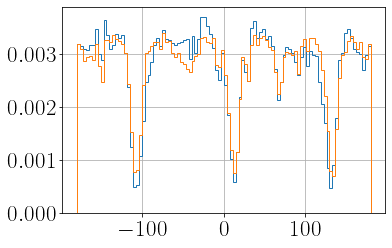

In [184]:
(epgExpInbCDFT.Pphi).hist(bins = np.linspace(-180, 180, 101), density=True, histtype = 'step')
(dvcsSimInbCDFT.Pphi).hist(bins = np.linspace(-180, 180, 101), density=True, histtype = 'step')

<AxesSubplot:>

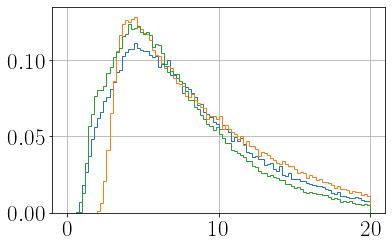

In [333]:
(epgExpInbFD.PAngleDiff).hist(bins = np.linspace(0, 20, 101), density=True, histtype = 'step')
(dvcsSimInbFD.PAngleDiff).hist(bins = np.linspace(0, 20, 101), density=True, histtype = 'step')
(bkgSimInbFD.PAngleDiff).hist(bins = np.linspace(0, 20, 101), density=True, histtype = 'step')

<AxesSubplot:>

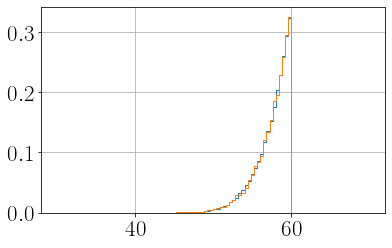

In [258]:
(dvcsSimInbCDFT.Ptheta).hist(bins = np.linspace(30, 70, 101), density=True, histtype = 'step')
(epgExpInbCDFT.Ptheta).hist(bins = np.linspace(30, 70, 101), density=True, histtype = 'step')

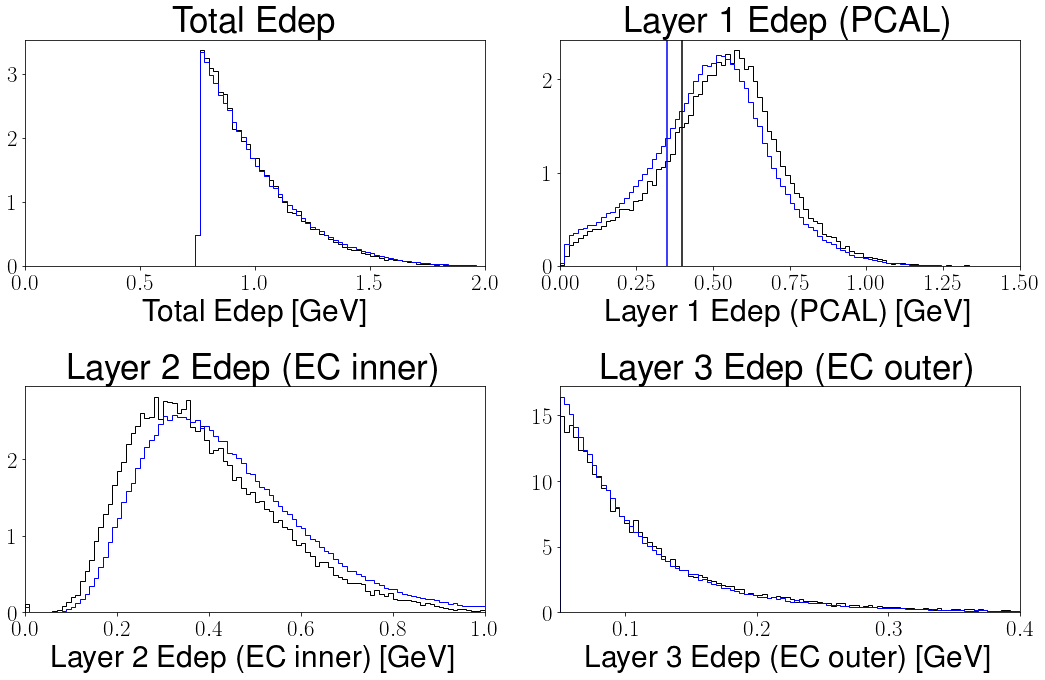

<Figure size 864x648 with 0 Axes>

In [117]:
varstoplot = ["Gedep", "Gedep1", "Gedep2", "Gedep3"]
title = ["Total Edep", "Layer 1 Edep (PCAL)", "Layer 2 Edep (EC inner)" , "Layer 3 Edep (EC outer)", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, GeV, GeV, GeV]
binstarts = [0, 0, 0, 0.05, -0.01, 0.1,-0.4 , 0]
binends = [2, 1.5, 1, 0.4, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 2, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,2):
        ind = 2*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
        if ind == 1:
            axs[yind, xind].axvline(0.35, color = 'b')
            axs[yind, xind].axvline(0.4, color = 'k')
plt.show()
plt.clf()

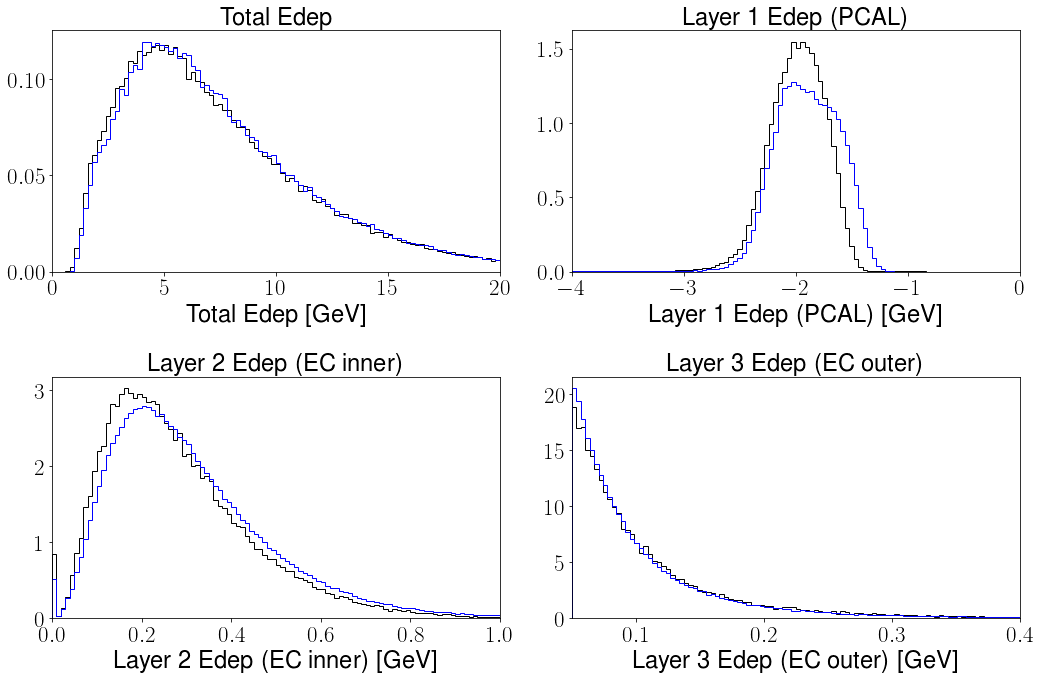

<Figure size 432x288 with 0 Axes>

In [356]:
varstoplot = ["PAngleDiff", "EAngleDiff", "Gedep2", "Gedep3"]
title = ["Total Edep", "Layer 1 Edep (PCAL)", "Layer 2 Edep (EC inner)" , "Layer 3 Edep (EC outer)", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, GeV, GeV, GeV]
binstarts = [0, -4, 0, 0.05, -0.01, 0.1,-0.4 , 0]
binends = [20, 0, 1, 0.4, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 2, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,2):
        ind = 2*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
        if ind == 1:
            axs[yind, xind].axvline(0.35, color = 'b')
            axs[yind, xind].axvline(0.4, color = 'k')
plt.show()
plt.clf()

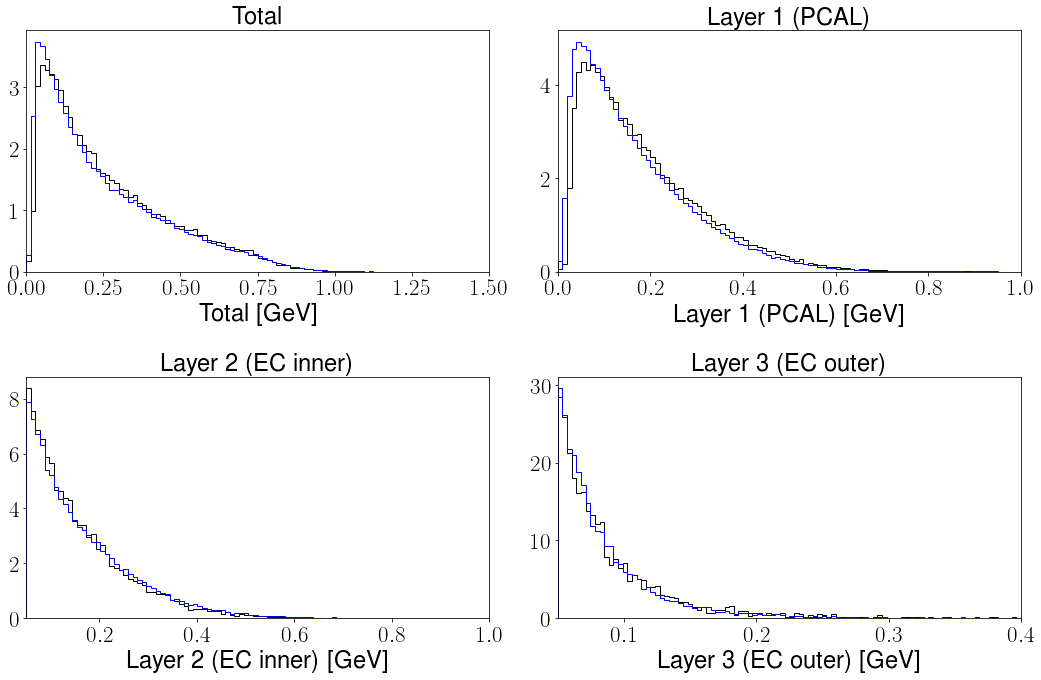

<Figure size 432x288 with 0 Axes>

In [81]:
varstoplot = ["Gedep2_tot", "Gedep12", "Gedep22", "Gedep32"]
title = ["Total", "Layer 1 (PCAL)", "Layer 2 (EC inner)" , "Layer 3 (EC outer)", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, GeV, GeV, GeV]
binstarts = [0, 0, 0.05, 0.05, -0.01, 0.1,-0.4 , 0]
binends = [1.5, 1, 1, 0.4, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 2, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,2):
        ind = 2*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()
plt.clf()

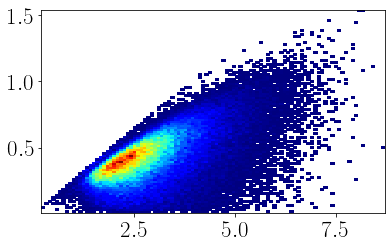

In [121]:
plt.hist2d(pi0ExpInbFD.Ge, pi0ExpInbFD.Gedep1, bins = 101, cmap = cmap, cmin = 1)
plt.show()

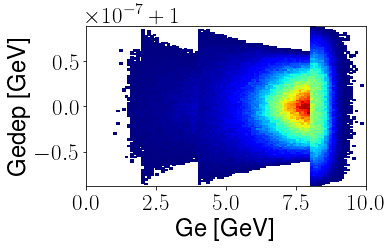

In [138]:
plt.hist2d(exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ge, exp_1g_corr.loc[exp_1g_corr.Gsector>7].Gedep/exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ge, bins = [np.linspace(0, 10, 101), 101], cmap = cmap, cmin = 1)
plt.ylabel("Gedep"+" ["+GeV+"]")
plt.xlabel("Ge" +" ["+GeV+"]")
plt.show()

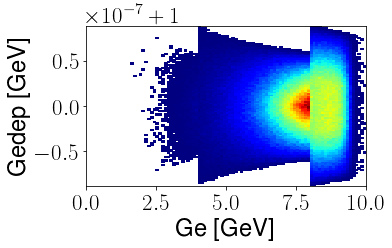

In [140]:
plt.hist2d(df_3987_corr.loc[df_3987_corr.Gsector>7].Ge, df_3987_corr.loc[df_3987_corr.Gsector>7].Gedep/df_3987_corr.loc[df_3987_corr.Gsector>7].Ge, bins = [np.linspace(0, 10, 101), 101], cmap = cmap, cmin = 1)
plt.ylabel("Gedep"+" ["+GeV+"]")
plt.xlabel("Ge" +" ["+GeV+"]")
plt.show()

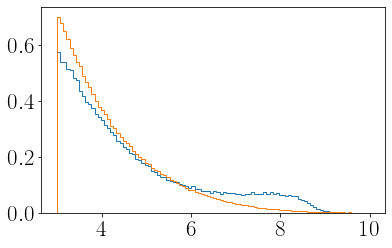

In [148]:
plt.hist(exp_2g_corr.Ge, bins = np.linspace(3, 10, 101), density = True, histtype = 'step')
plt.hist(df_4013_2g_corr.Ge, bins = np.linspace(3, 10, 101), density = True, histtype = 'step')
plt.show()

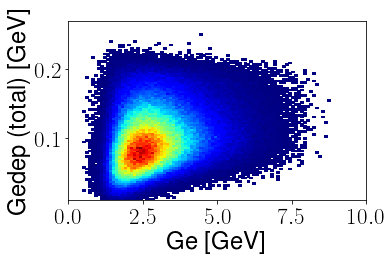

In [112]:
plt.hist2d(pi0SimInbFD.Ge, pi0SimInbFD.Gedep2/pi0SimInbFD.Ge, bins = [np.linspace(0, 10, 101), np.linspace(0.01, 0.27, 101)], cmap = cmap, cmin = 1)
plt.ylabel("Gedep (total)"+" ["+GeV+"]")
plt.xlabel("Ge" +" ["+GeV+"]")
plt.show()

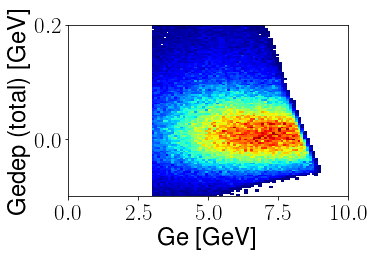

In [371]:
plt.hist2d(dvcsSimInbCD.Ge, dvcsSimInbCD.newGp/dvcsSimInbCD.Ge-1, bins = [np.linspace(0, 10, 101), np.linspace(-0.1, 0.2, 101)], cmap = cmap, cmin = 1)
plt.ylabel("Gedep (total)"+" ["+GeV+"]")
plt.xlabel("Ge" +" ["+GeV+"]")
plt.show()

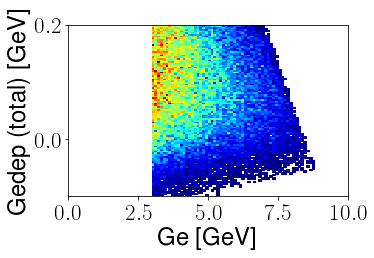

In [370]:
plt.hist2d(bkgSimInbCD.Ge, bkgSimInbCD.newGp/bkgSimInbCD.Ge-1, bins = [np.linspace(0, 10, 101), np.linspace(-0.1, 0.2, 101)], cmap = cmap, cmin = 1)
plt.ylabel("Gedep (total)"+" ["+GeV+"]")
plt.xlabel("Ge" +" ["+GeV+"]")
plt.show()

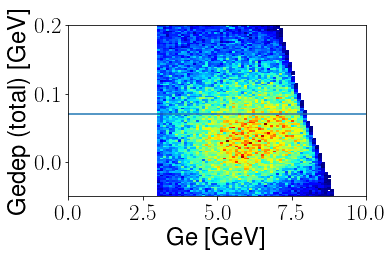

In [376]:
plt.hist2d(epgExpInbCD.Ge, epgExpInbCD.newGp/epgExpInbCD.Ge-1, bins = [np.linspace(0, 10, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin = 1)
plt.ylabel("Gedep (total)"+" ["+GeV+"]")
plt.xlabel("Ge" +" ["+GeV+"]")
plt.axhline(0.07)
plt.show()

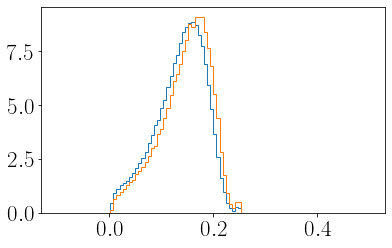

In [357]:
plt.hist(pi0SimInbFD.Gedep1/pi0SimInbFD.Ge, bins = np.linspace(-0.1, 0.5, 101), density = True, histtype = 'step')
plt.hist(pi0ExpInbFD.Gedep1/pi0ExpInbFD.Ge, bins = np.linspace(-0.1, 0.5, 101), density = True, histtype = 'step')
plt.show()

In [ ]:
plt.hist(pi0SimInbFD.Gedep1/pi0SimInbFD.Ge, bins = np.linspace(-0.1, 0.5, 101), density = True, histtype = 'step')
plt.hist(pi0ExpInbFD.Gedep1/pi0ExpInbFD.Ge, bins = np.linspace(-0.1, 0.5, 101), density = True, histtype = 'step')
plt.show()

In [75]:
pi0ExpInbFD.Gedep2_tot

0          0.658355
126        0.194348
187        0.396244
192        0.445573
261        0.346449
             ...   
4928183    0.322994
4928185    0.385089
4928214    0.087860
4928252    0.391619
4928335    0.195277
Name: Gedep2_tot, Length: 94370, dtype: float32

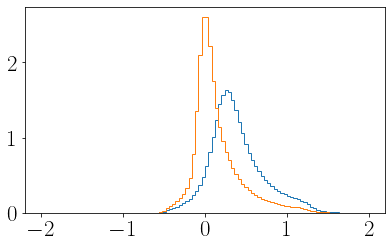

In [102]:
plt.hist(exp_1g_corr.newGp- exp_1g_corr.Gp, bins = np.linspace(-2, 2, 101), density = True, histtype = 'step')
plt.hist(dvcsSimInb.newGp- dvcsSimInb.Gp, bins = np.linspace(-2, 2, 101), density = True, histtype = 'step')
plt.show()

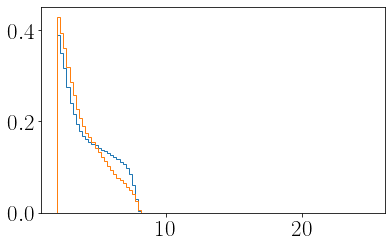

In [342]:
plt.hist(pd.concat([epgExpInbCDFT, epgExpInbCD]).Ep, bins = np.linspace(2, 25, 101), density = True, histtype = 'step')
plt.hist(pd.concat([dvcsSimInbCDFT, dvcsSimInbCD]).Ep, bins = np.linspace(2, 25, 101), density = True, histtype = 'step')
plt.show()

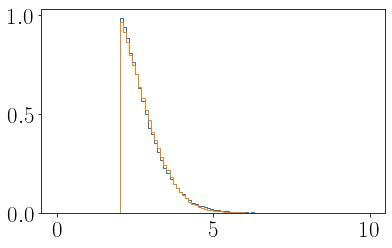

In [353]:
plt.hist(epgExpInbCDFT.Ep, bins = np.linspace(0, 10, 101), density = True, histtype = 'step')
plt.hist(dvcsSimInbCDFT.Ep, bins = np.linspace(0, 10, 101), density = True, histtype = 'step')
plt.show()

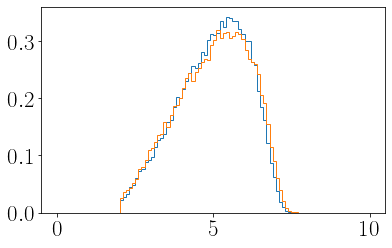

In [54]:
plt.hist(pi0ExpInbFD.Ep, bins = np.linspace(0, 10, 101), density = True, histtype = 'step')
plt.hist(pi0SimInbFD.Ep, bins = np.linspace(0, 10, 101), density = True, histtype = 'step')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
plt.hist2d(df_3284_2g_corr.Gphi2, df_3284_2g_corr.Gtheta2, bins = [np.linspace(-180, 180, 361), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1)
plt.title("Photon with less energy ("+r"$\gamma_2$"+"), DV"+r"$\pi^0$"+"P identified")
plt.xlabel(r"$\phi_{rec.}$"+" of "+r"$\gamma_2$ ["+degree+"]")
plt.ylabel(r"$\theta_{rec.}$"+" of "+r"$\gamma_2$"+" "+" ["+degree+"]")
# plt.xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
plt.show()
plt.hist2d(df_3284_1g_corr.GenGphi2, df_3284_1g_corr.GenGtheta2, bins = [np.linspace(-180, 180, 361), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1)
plt.title("Photon with less energy ("+r"$\gamma_2$"+"), DVCS misidentified")
plt.xlabel(r"$\phi_{gen.}$"+" of "+r"$\gamma_2$ ["+degree+"]")
plt.ylabel(r"$\theta_{gen.}$"+" of "+r"$\gamma_2$"+" "+" ["+degree+"]")
# plt.xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
plt.show()


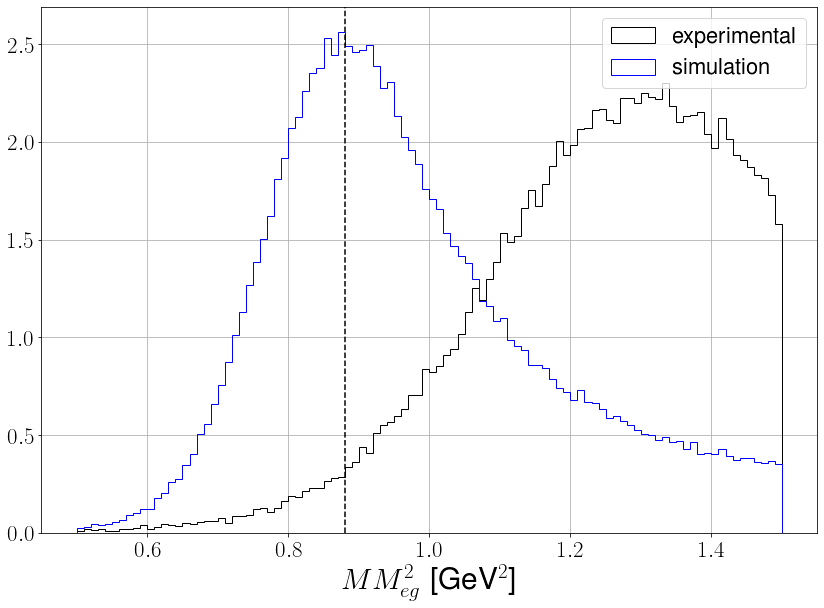

In [81]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.MM2_eg.hist(bins = np.linspace(0.5, 1.5, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.MM2_eg.hist(bins = np.linspace(0.5, 1.5, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$MM^{2}_{eg}$" + " ["+GeV2+"]")
plt.axvline(M**2, linestyle='--', color = 'k')
plt.show()

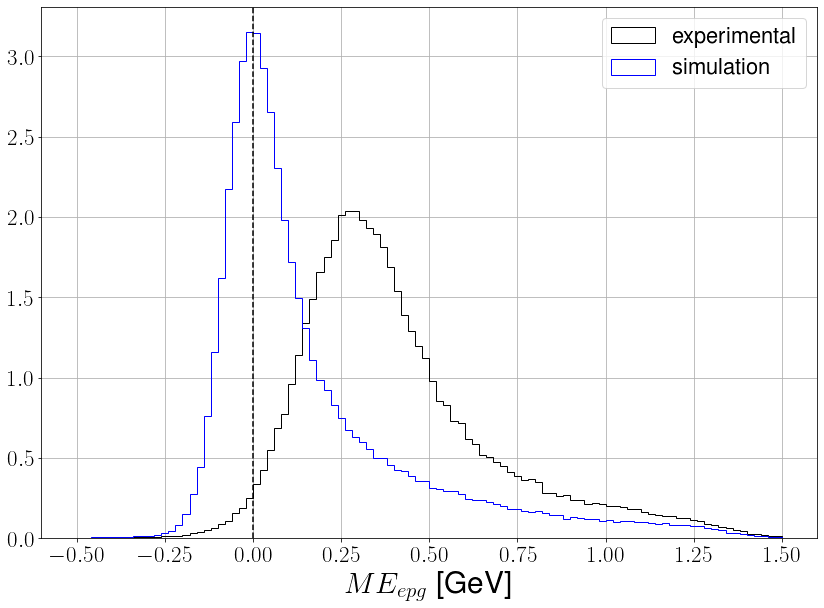

In [84]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.ME_epg.hist(bins = np.linspace(-0.5, 1.5, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.ME_epg.hist(bins = np.linspace(-0.5, 1.5, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$ME_{epg}$" + " ["+GeV+"]")
plt.axvline(0, linestyle='--', color = 'k')
plt.show()

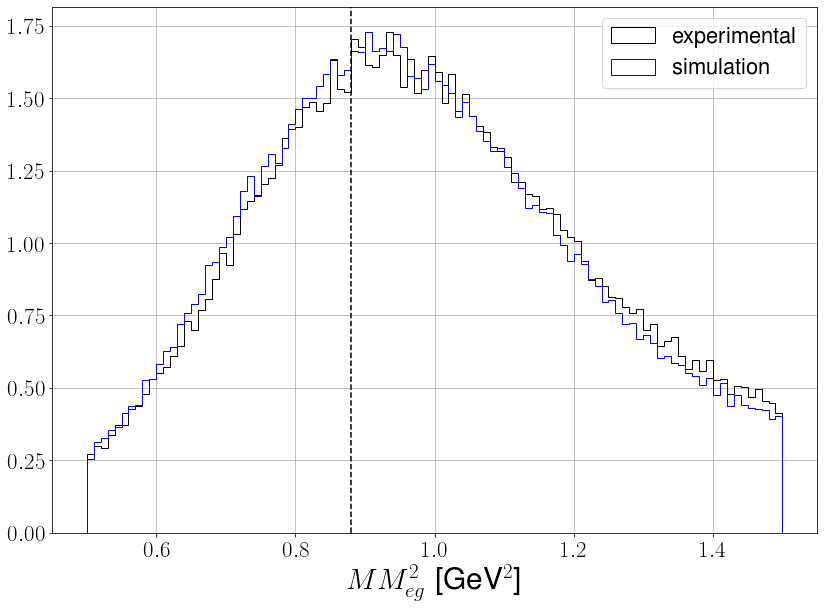

In [86]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
correctDVCS(epgExpInbCDFT).MM2_eg.hist(bins = np.linspace(0.5, 1.5, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
smearingDVCS(dvcsSimInbCDFT, 0.014).MM2_eg.hist(bins = np.linspace(0.5, 1.5, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$MM^{2}_{eg}$" + " ["+GeV2+"]")
plt.axvline(M**2, linestyle='--', color = 'k')
plt.show()


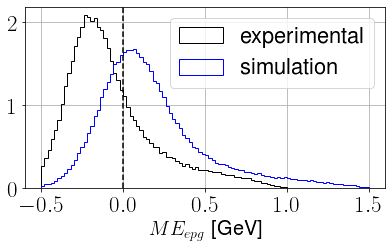

In [239]:
correctDVCS(epgExpInbCDFT).ME_epg.hist(bins = np.linspace(-0.5, 1.5, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
smearingDVCS(dvcsSimInbCDFT, 0.014).ME_epg.hist(bins = np.linspace(-0.5, 1.5, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$ME_{epg}$" + " ["+GeV+"]")
plt.axvline(0, linestyle='--', color = 'k')
plt.show()

In [105]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20


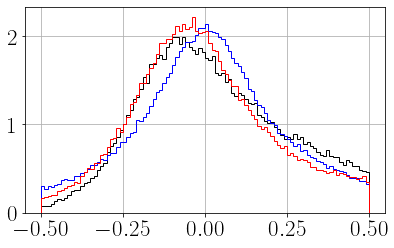

In [386]:
# plt.rcParams["figure.figsize"] = (12,9)
# plt.rcParams["axes.titlesize"] = 35
# plt.rcParams["axes.labelsize"] = 30
correctDVCS2(epgExpInbCDFT, 0.05/epgExpInbCDFT.Pp**2).MM2_ep.hist(bins = np.linspace(-0.5, 0.5, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
smearingDVCS2(dvcsSimInbCDFT, 0.2).MM2_ep.hist(bins = np.linspace(-0.5, 0.5, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
correctDVCS2(epgExpInbCDFT, 0).MM2_ep.hist(bins = np.linspace(-0.5, 0.5, 101), density = True, histtype = 'step', color = 'r', label = 'experimental')
# plt.legend(loc='upper right')
# plt.xlabel(r"$MM^{2}_{ep}$" + " ["+GeV2+"]")
# plt.axvline(M**2, linestyle='--', color = 'k')
plt.show()


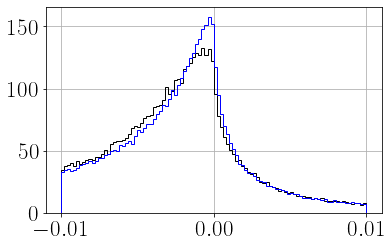

In [304]:
# plt.rcParams["figure.figsize"] = (12,9)
# plt.rcParams["axes.titlesize"] = 35
# plt.rcParams["axes.labelsize"] = 30
correctDVCS2(epgExpInbCDFT, 0.05).MM2_epg.hist(bins = np.linspace(-0.01, 0.01, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
smearingDVCS2(dvcsSimInbCDFT, 0.1).MM2_epg.hist(bins = np.linspace(-0.01, 0.01, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
# plt.legend(loc='upper right')
# plt.xlabel(r"$MM^{2}_{ep}$" + " ["+GeV2+"]")
# plt.axvline(M**2, linestyle='--', color = 'k')
plt.show()


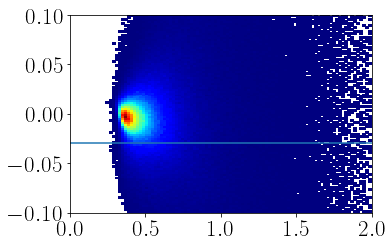

In [322]:
plt.hist2d(exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pp, (exp_1g_corr.loc[exp_1g_corr.Gsector>7].newPp - exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pp)*exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pp, bins = [np.linspace(0, 2, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1)
plt.axhline(-0.03)
plt.show()

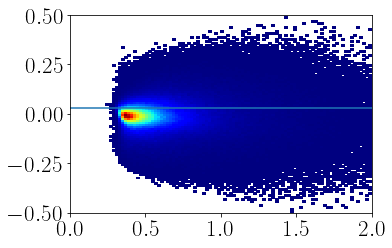

In [22]:
plt.hist2d(exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pp, (exp_1g_corr.loc[exp_1g_corr.Gsector>7].newPp - exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pp), bins = [np.linspace(0, 2, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1)
plt.axhline(0.03)
plt.show()

In [363]:
((epgExpInbCDFT.newPp - epgExpInbCDFT.Pp)/epgExpInbCDFT.Pp**2).mean()

0.03557675184423915

<AxesSubplot:>

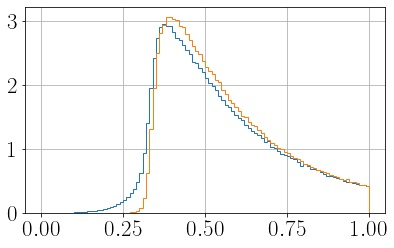

In [134]:
exp_1g_corr.loc[exp_1g_corr.Gsector>7].newPp.hist(bins = np.linspace(0,1, 101), density = True, histtype = 'step')
exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pp.hist(bins = np.linspace(0,1, 101), density = True, histtype = 'step')


<AxesSubplot:>

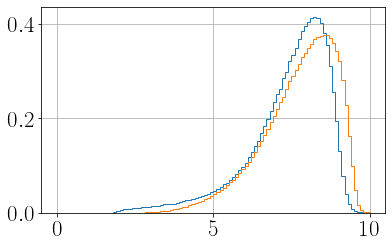

In [299]:
(1*exp_1g_corr.loc[exp_1g_corr.Gsector>7]).Gp.hist(bins = np.linspace(0,10, 101), density = True, histtype = 'step')
dvcsSimInb.loc[dvcsSimInb.Gsector>7].Gp.hist(bins = np.linspace(0,10, 101), density = True, histtype = 'step')

<AxesSubplot:>

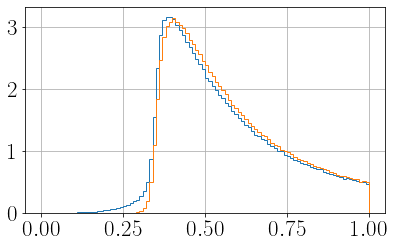

In [132]:
dvcsSimInb.loc[dvcsSimInb.Gsector>7].newPp.hist(bins = np.linspace(0,1, 101), density = True, histtype = 'step')
dvcsSimInb.loc[dvcsSimInb.Gsector>7].Pp.hist(bins = np.linspace(0,1, 101), density = True, histtype = 'step')

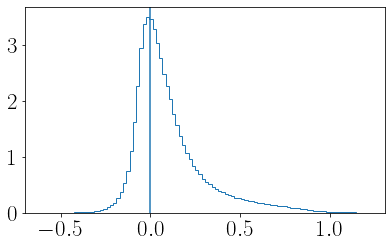

In [388]:
plt.hist(mag([exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppx+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpx, exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppy+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpy ,exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppz+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpz])-exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pp, bins = 100, density = True, histtype = 'step')
plt.axvline(0)
plt.show()

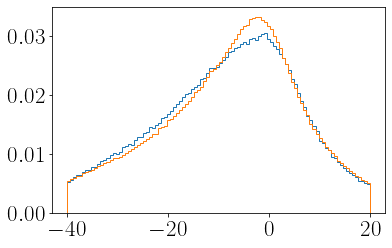

In [257]:
plt.hist(getTheta([exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppx+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpx, exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppy+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpy ,exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppz+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpz])-exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ptheta, bins = np.linspace(-40, 20 ,101), density = True, histtype = 'step')
plt.hist(getTheta([dvcsSimInb.loc[dvcsSimInb.Gsector>7].Ppx+dvcsSimInb.loc[dvcsSimInb.Gsector>7].Mpx, dvcsSimInb.loc[dvcsSimInb.Gsector>7].Ppy+dvcsSimInb.loc[dvcsSimInb.Gsector>7].Mpy ,dvcsSimInb.loc[dvcsSimInb.Gsector>7].Ppz+dvcsSimInb.loc[dvcsSimInb.Gsector>7].Mpz])-dvcsSimInb.loc[dvcsSimInb.Gsector>7].Ptheta, bins = np.linspace(-40, 20 ,101), density = True, histtype = 'step')
plt.show()

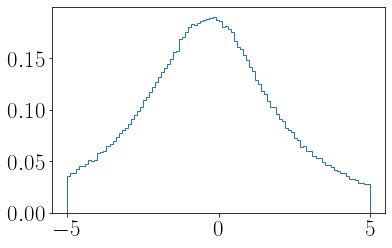

In [131]:
plt.hist(getPhi([exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppx+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpx, exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppy+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpy ,exp_1g_corr.loc[exp_1g_corr.Gsector>7].Ppz+exp_1g_corr.loc[exp_1g_corr.Gsector>7].Mpz])-exp_1g_corr.loc[exp_1g_corr.Gsector>7].Pphi, bins = np.linspace(-5, 5, 101), density = True, histtype = 'step')
plt.show()

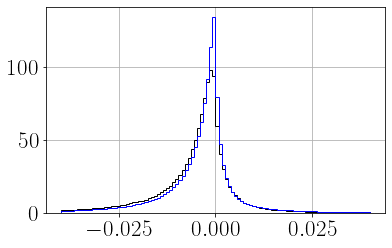

In [16]:
# plt.rcParams["figure.figsize"] = (12,9)
# plt.rcParams["axes.titlesize"] = 35
# plt.rcParams["axes.labelsize"] = 30
correctDVCS2(exp_1g_corr.loc[exp_1g_corr.Gsector>7], 0.05).loc[exp_1g_corr.Gsector>7].MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
smearingDVCS2(dvcsSimInb.loc[dvcsSimInb.Gsector>7], 0.1).MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
# plt.legend(loc='upper right')
# plt.xlabel(r"$MM^{2}_{ep}$" + " ["+GeV2+"]")
# plt.axvline(M**2, linestyle='--', color = 'k')
plt.show()


<AxesSubplot:>

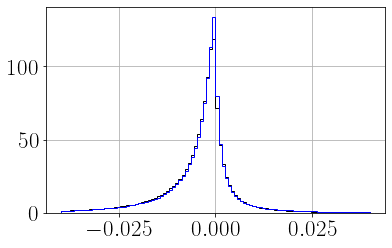

In [23]:
correctDVCS2(exp_1g_corr.loc[exp_1g_corr.Gsector>7], 0).loc[exp_1g_corr.Gsector>7].MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
smearingDVCS2(dvcsSimInb.loc[dvcsSimInb.Gsector>7], 0.1).MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')


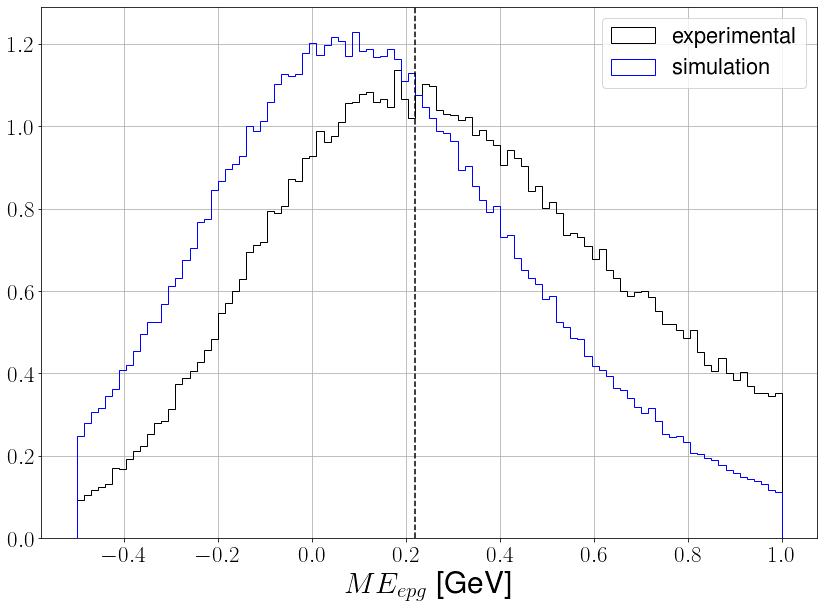

In [115]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
correctDVCS3(epgExpInbCD, 0).ME_epg.hist(bins = np.linspace(-0.5, 1, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
smearingDVCS3(dvcsSimInbCD, 0.035).ME_epg.hist(bins = np.linspace(-0.5, 1, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$ME_{epg}$" + " ["+GeV+"]")
plt.axvline(0.22, linestyle='--', color = 'k')
plt.show()

In [111]:
(1-contCD)*dvcsSimInbCD.ME_epg.mean()+contCD*bkgSimInbCD.ME_epg.mean()

0.2178591028541541

In [112]:
(1-contFD)*dvcsSimInbFD.ME_epg.mean()+contFD*bkgSimInbFD.ME_epg.mean()

0.1681799586951574

<AxesSubplot:>

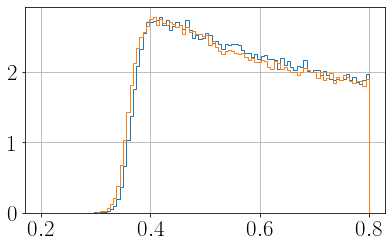

In [61]:
(epgExpInbCDFT.Pp+0.01).hist(bins = np.linspace(0.2, 0.8, 101), density=True, histtype = 'step')
(dvcsSimInbCDFT.Pp).hist(bins = np.linspace(0.2, 0.8, 101), density=True, histtype = 'step')

<AxesSubplot:>

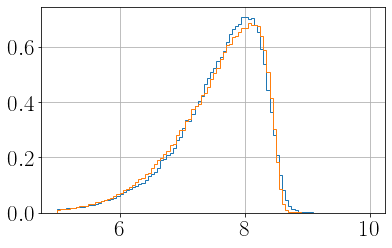

In [85]:
(epgExpInbCDFT.Gp+0.25).hist(bins = np.linspace(5, 10, 101), density=True, histtype = 'step')
dvcsSimInbCDFT.Gp.hist(bins = np.linspace(5, 10, 101), density=True, histtype = 'step')

<AxesSubplot:>

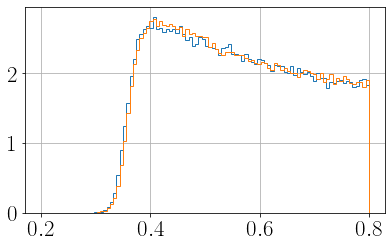

In [93]:
(epgExpInbCDFT.Pp).hist(bins = np.linspace(0.2, 0.8, 101), density=True, histtype = 'step')
(dvcsSimInbCDFT.Pp).hist(bins = np.linspace(0.2, 0.8, 101), density=True, histtype = 'step')

<AxesSubplot:>

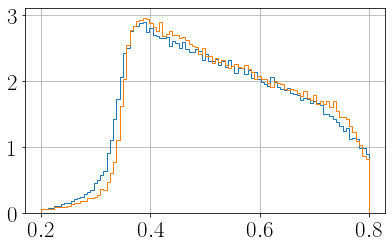

In [112]:
(epgExpInbCDFT.newPp).hist(bins = np.linspace(0.2, 0.8, 101), density=True, histtype = 'step')
(dvcsSimInbCDFT.newPp).hist(bins = np.linspace(0.2, 0.8, 101), density=True, histtype = 'step')

<AxesSubplot:>

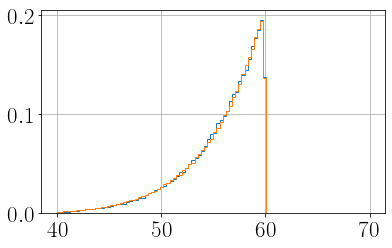

In [95]:
(epgExpInbCDFT.Ptheta).hist(bins = np.linspace(40, 70, 101), density=True, histtype = 'step')
(dvcsSimInbCDFT.Ptheta).hist(bins = np.linspace(40, 70, 101), density=True, histtype = 'step')

In [127]:
epgExpInbCDFT.loc[:, "Ppx2"] = epgExpInbCDFT.loc[:, "Ppx"] + epgExpInbCDFT.loc[:, "Mpx"]
epgExpInbCDFT.loc[:, "Ppy2"] = epgExpInbCDFT.loc[:, "Ppy"] + epgExpInbCDFT.loc[:, "Mpy"]
epgExpInbCDFT.loc[:, "Ppz2"] = epgExpInbCDFT.loc[:, "Ppz"] + epgExpInbCDFT.loc[:, "Mpz"]
epgExpInbCDFT.loc[:, "Pp2"] = mag([epgExpInbCDFT.Ppx2, epgExpInbCDFT.Ppy2, epgExpInbCDFT.Ppz2])
epgExpInbCDFT.loc[:, "Ptheta2"] = getTheta([epgExpInbCDFT.Ppx2, epgExpInbCDFT.Ppy2, epgExpInbCDFT.Ppz2])
epgExpInbCDFT.loc[:, "Pphi2"] = getPhi([epgExpInbCDFT.Ppx2, epgExpInbCDFT.Ppy2, epgExpInbCDFT.Ppz2])

dvcsSimInbCDFT.loc[:, "Ppx2"] = dvcsSimInbCDFT.loc[:, "Ppx"] + dvcsSimInbCDFT.loc[:, "Mpx"]
dvcsSimInbCDFT.loc[:, "Ppy2"] = dvcsSimInbCDFT.loc[:, "Ppy"] + dvcsSimInbCDFT.loc[:, "Mpy"]
dvcsSimInbCDFT.loc[:, "Ppz2"] = dvcsSimInbCDFT.loc[:, "Ppz"] + dvcsSimInbCDFT.loc[:, "Mpz"]
dvcsSimInbCDFT.loc[:, "Pp2"] = mag([dvcsSimInbCDFT.Ppx2, dvcsSimInbCDFT.Ppy2, dvcsSimInbCDFT.Ppz2])
dvcsSimInbCDFT.loc[:, "Ptheta2"] = getTheta([dvcsSimInbCDFT.Ppx2, dvcsSimInbCDFT.Ppy2, dvcsSimInbCDFT.Ppz2])
dvcsSimInbCDFT.loc[:, "Pphi2"] = getPhi([dvcsSimInbCDFT.Ppx2, dvcsSimInbCDFT.Ppy2, dvcsSimInbCDFT.Ppz2])

<AxesSubplot:>

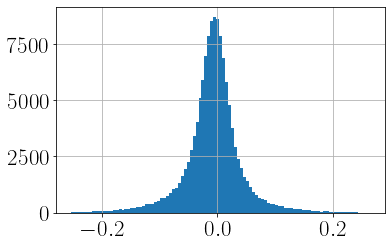

In [98]:
epgExpInbCDFT.Mpy.hist(bins = 101)

<AxesSubplot:>

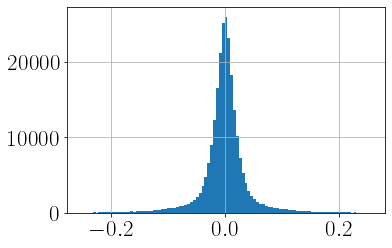

In [113]:
dvcsSimInbCDFT.Mpy.hist(bins = 101)

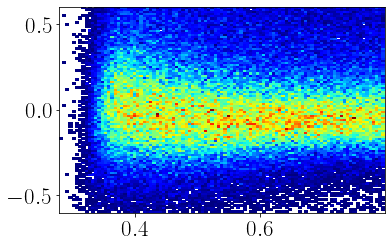

In [106]:
plt.hist2d(epgExpInbCDFT.Pp, epgExpInbCDFT.MM2_ep, bins = 101, cmap = cmap, cmin = 1)
plt.show()

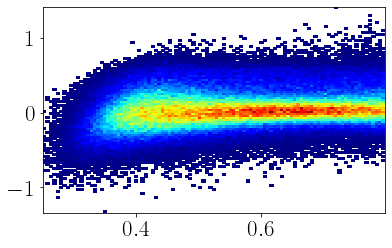

In [133]:
plt.hist2d(dvcsSimInbCDFT.Pp, dvcsSimInbCDFT.MM2_ep, bins = 101, cmap = cmap, cmin = 1)
plt.show()

<AxesSubplot:>

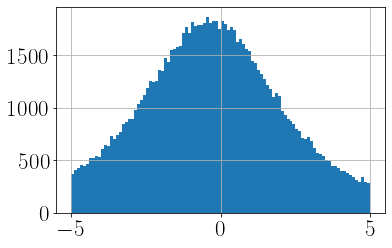

In [118]:
(epgExpInbCDFT.Pphi2-epgExpInbCDFT.Pphi).hist(bins = np.linspace(-5, 5, 101))

<AxesSubplot:>

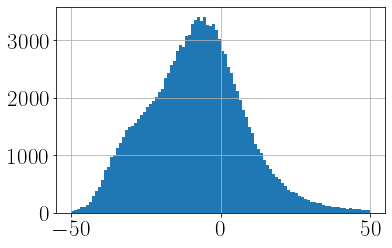

In [120]:
(epgExpInbCDFT.Ptheta2-epgExpInbCDFT.Ptheta).hist(bins = np.linspace(-50, 50, 101))

<AxesSubplot:>

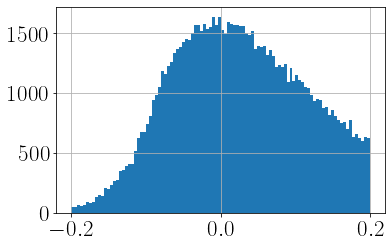

In [122]:
(epgExpInbCDFT.Pp2-epgExpInbCDFT.Pp).hist(bins = np.linspace(-0.2, 0.2, 101))

<AxesSubplot:>

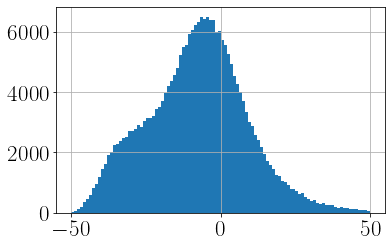

In [129]:
(dvcsSimInbCDFT.Ptheta2 - dvcsSimInbCDFT.Ptheta).hist(bins = np.linspace(-50, 50, 101))

<AxesSubplot:>

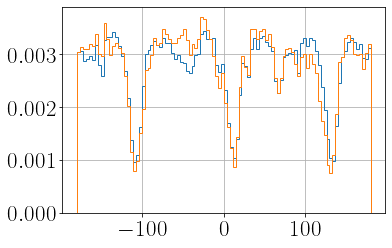

In [156]:
dvcsSimInbCDFT.Pphi.hist(bins = np.linspace(-180, 180, 101), density =True, histtype = 'step')
epgExpInbCDFT.Pphi.hist(bins = np.linspace(-180, 180, 101), density =True, histtype = 'step')

<AxesSubplot:>

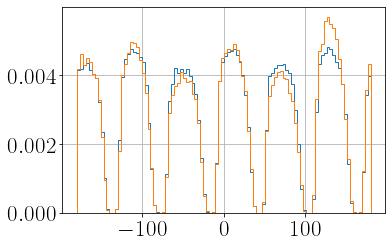

In [157]:
dvcsSimInbCDFT.Ephi.hist(bins = np.linspace(-180, 180, 101), density =True, histtype = 'step')
epgExpInbCDFT.Ephi.hist(bins = np.linspace(-180, 180, 101), density =True, histtype = 'step')

<AxesSubplot:>

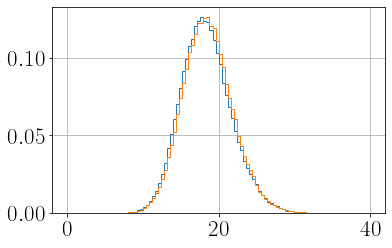

In [158]:
dvcsSimInbCDFT.Etheta.hist(bins = np.linspace(0, 40, 101), density =True, histtype = 'step')
epgExpInbCDFT.Etheta.hist(bins = np.linspace(0, 40, 101), density =True, histtype = 'step')

In [137]:
test = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/data/dvcs_inb_noCorr.pkl")
test2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/data/dvcs_inb_corr.pkl")

<AxesSubplot:>

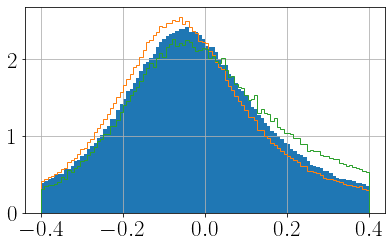

In [144]:
test.loc[(test.Gsector>7) & (test.Psector>7)].MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density =True)
test2.loc[(test2.Gsector>7) & (test2.Psector>7)].MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101),histtype = 'step', density =True)
epgExpInbCDFT.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), histtype = 'step', density =True)

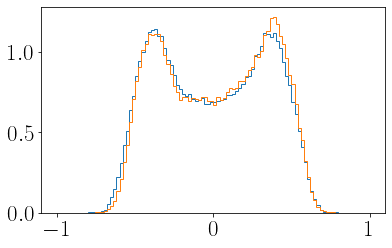

In [542]:
plt.hist(dvcsSimInbCDFT.Mpx + dvcsSimInbCDFT.Gpx, bins = np.linspace(-1, 1, 101), histtype = 'step', density = True)
plt.hist(epgExpInbCDFT.Mpx + epgExpInbCDFT.Gpx, bins = np.linspace(-1, 1, 101), histtype = 'step', density = True)

plt.show()

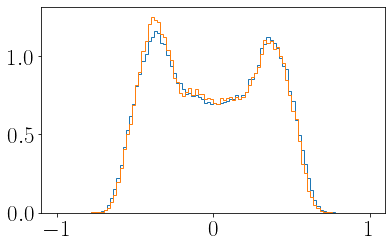

In [543]:
plt.hist(dvcsSimInbCDFT.Mpy + dvcsSimInbCDFT.Gpy, bins = np.linspace(-1, 1, 101), histtype = 'step', density = True)
plt.hist(epgExpInbCDFT.Mpy + epgExpInbCDFT.Gpy, bins = np.linspace(-1, 1, 101), histtype = 'step', density = True)

plt.show()

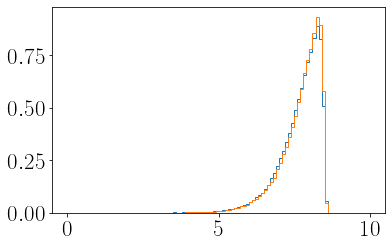

In [173]:
plt.hist(dvcsSimInbCDFT.Mpz + dvcsSimInbCDFT.Gpz, bins = np.linspace(0, 10, 101), histtype = 'step', density = True)
plt.hist(epgExpInbCDFT.Mpz + epgExpInbCDFT.Gpz, bins = np.linspace(0, 10, 101), histtype = 'step', density = True)

plt.show()

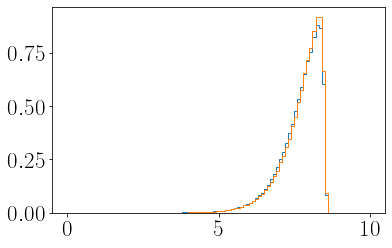

In [174]:
plt.hist(dvcsSimInbCDFT.ME_epg + dvcsSimInbCDFT.Gp, bins = np.linspace(0, 10, 101), histtype = 'step', density = True)
plt.hist(epgExpInbCDFT.ME_epg + epgExpInbCDFT.Gp, bins = np.linspace(0, 10, 101), histtype = 'step', density = True)

plt.show()

<AxesSubplot:>

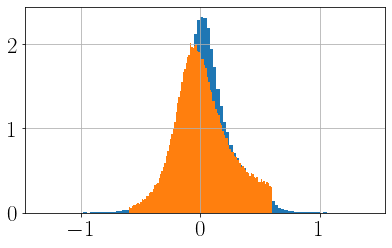

In [181]:
((dvcsSimInbCDFT.ME_epg + dvcsSimInbCDFT.Gp)**2-(dvcsSimInbCDFT.Mpx + dvcsSimInbCDFT.Gpx)**2-(dvcsSimInbCDFT.Mpy + dvcsSimInbCDFT.Gpy)**2-(dvcsSimInbCDFT.Mpz + dvcsSimInbCDFT.Gpz)**2).hist(bins= 101, density = True)
((epgExpInbCDFT.ME_epg + epgExpInbCDFT.Gp)**2-(epgExpInbCDFT.Mpx + epgExpInbCDFT.Gpx)**2-(epgExpInbCDFT.Mpy + epgExpInbCDFT.Gpy)**2-(epgExpInbCDFT.Mpz + epgExpInbCDFT.Gpz)**2).hist(bins= 101, density = True)

<AxesSubplot:>

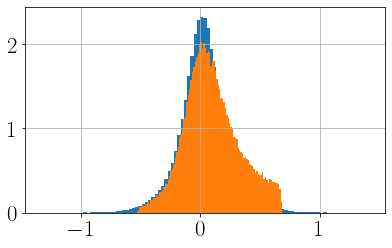

In [206]:
((dvcsSimInbCDFT.ME_epg + dvcsSimInbCDFT.Gp)**2-(dvcsSimInbCDFT.Mpx + dvcsSimInbCDFT.Gpx)**2-(dvcsSimInbCDFT.Mpy + dvcsSimInbCDFT.Gpy)**2-(dvcsSimInbCDFT.Mpz + dvcsSimInbCDFT.Gpz)**2).hist(bins= 101, density = True)
((epgExpInbCDFT.ME_epg + epgExpInbCDFT.Gp)**2-(epgExpInbCDFT.Mpx + epgExpInbCDFT.Gpx)**2-(epgExpInbCDFT.Mpy + epgExpInbCDFT.Gpy)**2-(epgExpInbCDFT.Mpz + epgExpInbCDFT.Gpz-0.005)**2).hist(bins= 101, density = True)

<AxesSubplot:>

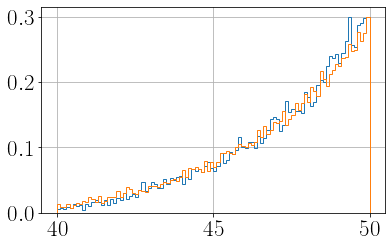

In [246]:
(epgExpInbCDFT.Ptheta).hist(bins = np.linspace(40, 50, 101), density =True, histtype = 'step')
dvcsSimInbCDFT.Ptheta.hist(bins = np.linspace(40, 50, 101), density =True, histtype = 'step')


In [534]:
def correctDVCS2(df_epg, correction=0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector>7, 'Pp'] = df_epg.loc[df_epg.Psector>7, 'Pp']
    df_epg.loc[df_epg.Psector>7, 'Ptheta'] = df_epg.loc[df_epg.Psector>7, 'Ptheta'] - 0.5
    df_epg.loc[df_epg.Psector>7, 'Pphi'] = df_epg.loc[df_epg.Psector>7, 'Pphi'] 
    df_epg.loc[df_epg.Psector>7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector>7, 'Pp']**2+M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
    
#     df_epg.loc[df_epg.Gsector>7, 'Gp'] = df_epg.loc[df_epg.Gsector>7, 'Gp'] + 0.25
#     df_epg.loc[df_epg.Gsector>7, 'Ge'] = df_epg.loc[df_epg.Gsector>7, 'Ge'] + 0.25
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg

In [538]:
epgExpInbCDFT = correctDVCS2(epgExpInbCDFT)

<AxesSubplot:>

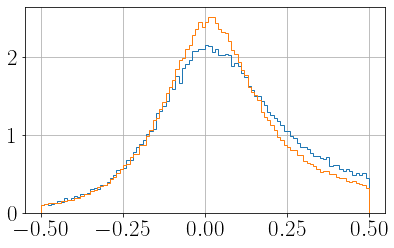

In [539]:
epgExpInbCDFT.MM2_ep.hist(bins = np.linspace(-0.5, 0.5, 101), density = True, histtype = 'step')
dvcsSimInbCDFT.MM2_ep.hist(bins = np.linspace(-0.5, 0.5, 101), density = True, histtype = 'step')

In [537]:
epgExpInbCDFT.Pp

11         0.443402
12         0.759595
91         0.480964
129        0.344197
150        0.484488
             ...   
3663088    0.511965
3663125    0.749168
3663183    0.678040
3663186    0.543861
3663204    0.400952
Name: Pp, Length: 126993, dtype: float64

In [523]:
epgExpInbCDFT = exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.25)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]


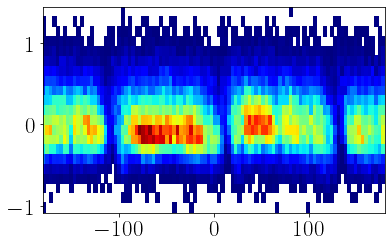

In [468]:
plt.hist2d(epgExpInbCDFT.loc[np.abs(epgExpInbCDFT.Pchi2pid)<2.46].Pphi, epgExpInbCDFT.loc[np.abs(epgExpInbCDFT.Pchi2pid)<2.46].MM2_ep, bins = [np.linspace(-180, 180,101), 21], cmap = cmap, cmin = 1)
plt.show()

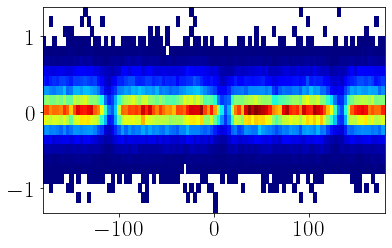

In [452]:
plt.hist2d(dvcsSimInbCDFT.Pphi, dvcsSimInbCDFT.MM2_ep, bins = [np.linspace(-180, 180 ,101), 21], cmap = cmap, cmin = 1)
plt.show()

<AxesSubplot:>

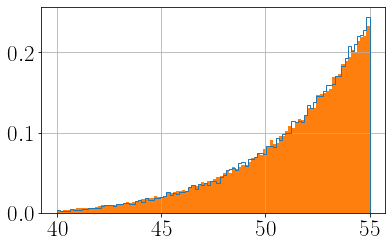

In [541]:
epgExpInbCDFT.Ptheta.hist(density = True, bins = np.linspace(40, 55, 101), histtype = 'step')
dvcsSimInbCDFT.Ptheta.hist(density = True, bins = np.linspace(40, 55, 101))